In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train=pd.read_csv("C:/Users/Vikas Sharma/OneDrive/My Python Projects/Property_train.csv")
test=pd.read_csv("C:/Users/Vikas Sharma/OneDrive/My Python Projects/Property_test_share.csv")

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
train

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62030,1,DPIW,15110.0,3/31/2010,1PUV,8745,CAT3,missing,missing,13468.0,0,15279.0,9584.0,11626.0,missing,Direct,94544,1893,32T2,I3Z9,13858.0,A,10012.0,9D54,WHITE,CA,87562,2006,A,4,11162.0
62031,0,YOC7,9456.0,10/20/2010,RRJQ,5360,OTHER,B,missing,8543.0,0,9420.0,5187.0,6683.0,missing,Direct,37122,594,WHBI,4GZ4,8600.0,A,5439.0,E75G,GOLD,TN,80201,2007,B,3,6147.0
62032,1,CNKZ,8730.0,5/19/2009,ZCI3,6670,CAT3,A,missing,7217.0,0,8730.0,6219.0,7620.0,missing,Direct,46803,1313,W62B,I3Z9,7217.0,A,6219.0,UA42,MAROON,IN,65983,2005,A,4,7620.0
62033,0,RELA,8546.0,4/30/2009,X7IX,6600,CAT1,A,missing,7316.0,0,8546.0,6311.0,7450.0,missing,Direct,79932,837,WHBI,YIK5,7316.0,A,6311.0,ASW2,SILVER,TX,59780,2006,A,3,7450.0


In [7]:
train.shape

(62035, 31)

In [8]:
train.dtypes

Junk                      int64
InteriorsStyle           object
PriceIndex8              object
ListDate                 object
Material                 object
PriceIndex9               int64
Agency                   object
AreaIncomeType           object
EnvRating                object
PriceIndex7              object
ExpeditedListing          int64
PriceIndex4              object
PriceIndex1              object
PriceIndex6              object
PRIMEUNIT                object
Channel                  object
Zip                       int64
InsurancePremiumIndex     int64
PlotType                 object
Architecture             object
PriceIndex3              object
Region                   object
PriceIndex5              object
SubModel                 object
Facade                   object
State                    object
NormalisedPopulation      int64
BuildYear                 int64
RegionType               object
PropertyAge               int64
PriceIndex2              object
dtype: o

In [9]:
##checking null and storing in variable
nulls= train["PriceIndex8"].isnull()

In [10]:
##to check null values count
nulls.sum()

0

In [11]:
train["PriceIndex8"].value_counts()

0.0        431
missing    272
7478.0     242
7611.0     154
8546.0     111
          ... 
3624.0       1
14301.0      1
16178.0      1
5960.0       1
17488.0      1
Name: PriceIndex8, Length: 12686, dtype: int64

In [12]:
train["PriceIndex8"]= pd.to_numeric(train["PriceIndex8"], errors="coerce")
train["PriceIndex8"].value_counts()

0.0        431
7478.0     242
7611.0     154
8546.0     111
9256.0      96
          ... 
5821.0       1
7019.0       1
5027.0       1
16879.0      1
22893.0      1
Name: PriceIndex8, Length: 12685, dtype: int64

In [13]:
train["PriceIndex8"].mean()

10148.33767789777

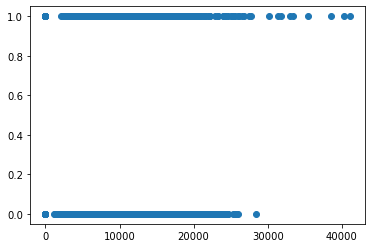

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=1)
ax.scatter(train["PriceIndex8"],y=train["Junk"])

In [15]:
train["PriceIndex8"].fillna("10148.33",inplace=True)

In [16]:
nullsnew=train["PriceIndex8"].isnull()
nullsnew.sum()

0

In [17]:
train["PriceIndex8"]=pd.to_numeric(train["PriceIndex8"])

In [18]:
#from sklearn.preprocessing import StandardScaler

In [19]:
#stdscl=StandardScaler()

In [20]:
#ssd=stdscl.fit(train[["PriceIndex8"]])

In [21]:
#ssd

In [22]:
#train["PriceIndex8"]=ssd.transform(train[["PriceIndex8"]])

In [23]:
train["PriceIndex8"]

0        14674.0
1         4172.0
2         8210.0
3         7309.0
4         9182.0
          ...   
62030    15110.0
62031     9456.0
62032     8730.0
62033     8546.0
62034    12658.0
Name: PriceIndex8, Length: 62035, dtype: float64

In [23]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0


In [24]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
ListDate                  object
Material                  object
PriceIndex9                int64
Agency                    object
AreaIncomeType            object
EnvRating                 object
PriceIndex7               object
ExpeditedListing           int64
PriceIndex4               object
PriceIndex1               object
PriceIndex6               object
PRIMEUNIT                 object
Channel                   object
Zip                        int64
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3               object
Region                    object
PriceIndex5               object
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex

In [24]:
del train["ListDate"]

In [25]:
train["Agency"].value_counts()

CAT1       21545
CAT2       19862
CAT3       10455
OTHER      10168
missing        5
Name: Agency, dtype: int64

In [26]:
train.loc[train["Agency"]=="missing", "Agency"]= "OTHER"
train["Agency"].value_counts()

CAT1     21545
CAT2     19862
CAT3     10455
OTHER    10173
Name: Agency, dtype: int64

In [27]:
dummy =pd.get_dummies(train["Agency"],drop_first=True)

In [28]:
train=pd.concat([train,dummy],axis=1)
del train["Agency"]

In [30]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER
0,0,6LLJ,14674.0,UT7W,8270,B,missing,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,0,1,0
1,1,XZ9F,4172.0,PRN0,3890,B,missing,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,1,0,0
2,0,QWEV,8210.0,A9RA,5900,B,missing,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,0,0,0
3,0,MK2K,7309.0,RRJQ,7460,A,missing,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,0,0,1
4,0,GK4G,9182.0,HE5A,6400,B,missing,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,0,0,1


In [31]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9                int64
AreaIncomeType            object
EnvRating                 object
PriceIndex7               object
ExpeditedListing           int64
PriceIndex4               object
PriceIndex1               object
PriceIndex6               object
PRIMEUNIT                 object
Channel                   object
Zip                        int64
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3               object
Region                    object
PriceIndex5               object
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2               object
CAT2                       uint8
CAT3      

In [29]:
##AreaIncomeType 
train.loc[train["AreaIncomeType"]=='missing',"AreaIncomeType"]= "A"

In [33]:
train["AreaIncomeType"].value_counts()

A    33241
B    28150
C      644
Name: AreaIncomeType, dtype: int64

In [30]:
dummies=pd.get_dummies(train["AreaIncomeType"], drop_first=True)
train=pd.concat([train,dummies],axis=1)
del train['AreaIncomeType']

In [35]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9                int64
EnvRating                 object
PriceIndex7               object
ExpeditedListing           int64
PriceIndex4               object
PriceIndex1               object
PriceIndex6               object
PRIMEUNIT                 object
Channel                   object
Zip                        int64
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3               object
Region                    object
PriceIndex5               object
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2               object
CAT2                       uint8
CAT3                       uint8
OTHER     

In [36]:
## EnvRating , 
train["EnvRating"].value_counts()

missing    59092
GREEN       2875
RED           68
Name: EnvRating, dtype: int64

In [31]:
del train["EnvRating"]

In [32]:
##PriceIndex7 
train["PriceIndex7"]=pd.to_numeric(train["PriceIndex7"],errors="coerce")
train["PriceIndex7"].value_counts()

0.0        431
6418.0     237
6515.0     154
7316.0     115
7907.0     102
          ... 
13588.0      1
2889.0       1
4385.0       1
20831.0      1
2953.0       1
Name: PriceIndex7, Length: 12077, dtype: int64

In [33]:
nul=train["PriceIndex7"].isnull()
nul.sum()

272

In [34]:
train["PriceIndex7"].mean()

8778.171834269708

In [35]:
train["PriceIndex7"].fillna(8778.17,inplace=True)

In [36]:
#vks=stdscl.fit(train[["PriceIndex7"]])
#train["PriceIndex7"]=vks.transform(train[["PriceIndex7"]])

In [43]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,0,1,0,1,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,1,0,0,1,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,0,0,0,1,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,0,0,1,0,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,0,0,1,1,0


In [44]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9                int64
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4               object
PriceIndex1               object
PriceIndex6               object
PRIMEUNIT                 object
Channel                   object
Zip                        int64
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3               object
Region                    object
PriceIndex5               object
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2               object
CAT2                       uint8
CAT3                       uint8
OTHER                      uint8
B         

In [46]:
#scc=["PriceIndex4" , "PriceIndex1" , "PriceIndex6"]

#for i in scc:
 #   train[i]=pd.to_numeric(train[i], errors="coerce")
  #  train[i].fillna(train[i].mean(),inplace=True)
   # xyz=train[i].isnull()
    #xyz.sum()

In [37]:
train["PriceIndex4"]=pd.to_numeric(train["PriceIndex4"], errors="coerce")
train["PriceIndex4"].mean()

9851.665935731446

In [38]:
train["PriceIndex4"].fillna(9851.66,inplace=True)

In [39]:
x=train["PriceIndex4"].isnull()
x.sum()

0

In [52]:
#shh=stdscl.fit(train[["PriceIndex4"]])
#train["PriceIndex4"]=shh.transform(train[["PriceIndex4"]])

In [40]:
train["PriceIndex1"]=pd.to_numeric(train["PriceIndex1"], errors="coerce")
train["PriceIndex1"].mean()

6131.0882604279195

In [41]:
train["PriceIndex1"].fillna(6131.088,inplace=True)
y=train["PriceIndex1"].isnull()
y.sum()

0

In [50]:
#svs=stdscl.fit(train[["PriceIndex1"]])
#train["PriceIndex1"]=svs.transform(train[["PriceIndex1"]])

In [42]:
train["PriceIndex6"]=pd.to_numeric(train["PriceIndex6"], errors="coerce")
train["PriceIndex6"].mean()

7393.599485128637

In [43]:
train["PriceIndex6"].fillna(7393.599,inplace=True)
z=train["PriceIndex6"].isnull()
z.sum()

0

In [56]:
#nvs=stdscl.fit(train[["PriceIndex6"]])
#train["PriceIndex6"]=nvs.transform(train[["PriceIndex6"]])

In [53]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,21075,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,0,1,0,1,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,73129,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,1,0,0,1,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,Other,29697,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,0,0,0,1,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,28273,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,0,0,1,0,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,Other,29697,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,0,0,1,1,0


In [54]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9                int64
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
PRIMEUNIT                 object
Channel                   object
Zip                        int64
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3               object
Region                    object
PriceIndex5               object
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2               object
CAT2                       uint8
CAT3                       uint8
OTHER                      uint8
B         

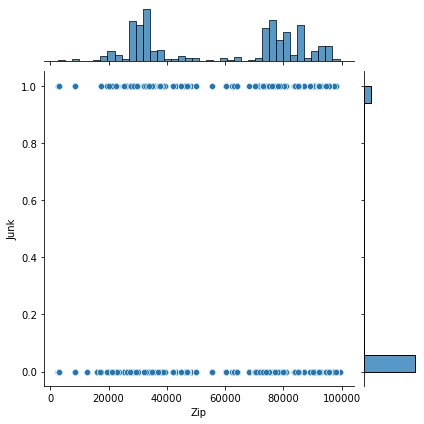

In [59]:
sns.jointplot(x=train["Zip"],y=train["Junk"])

In [44]:
del train["Zip"]

In [56]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,Direct,623,WHBI,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,0,1,0,1,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,Direct,1689,WHBI,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,1,0,0,1,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,Other,2351,W62B,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,0,0,0,1,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,Agent,1933,WLQ6,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,0,0,1,0,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,Other,482,WHBI,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,0,0,1,1,0


In [62]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9                int64
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
PRIMEUNIT                 object
Channel                   object
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3               object
Region                    object
PriceIndex5               object
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2               object
CAT2                       uint8
CAT3                       uint8
OTHER                      uint8
B                          uint8
C         

In [45]:
##3,5,2
train["PriceIndex3"]=pd.to_numeric(train["PriceIndex3"], errors="coerce")
train["PriceIndex3"].fillna(train["PriceIndex3"].mean(),inplace=True)
z=train["PriceIndex3"].isnull()
z.sum()

0

In [46]:
#svsvsv=stdscl.fit(train[["PriceIndex3"]])
#train["PriceIndex3"]=svsvsv.transform(train[["PriceIndex3"]])

In [47]:
train["PriceIndex5"]=pd.to_numeric(train["PriceIndex5"], errors="coerce")
train["PriceIndex5"].fillna(train["PriceIndex5"].mean(),inplace=True)
ni=train["PriceIndex5"].isnull()
ni.sum()

0

In [66]:
#vksvks=stdscl.fit(train[["PriceIndex5"]])
#train["PriceIndex5"]=vksvks.transform(train[["PriceIndex5"]])

In [48]:
train["PriceIndex2"]=pd.to_numeric(train["PriceIndex2"], errors="coerce")
train["PriceIndex2"].fillna(train["PriceIndex2"].mean(),inplace=True)
nji=train["PriceIndex2"].isnull()
nji.sum()

0

In [68]:
#vkssvs=stdscl.fit(train[["PriceIndex2"]])
#train["PriceIndex2"]=vkssvs.transform(train[["PriceIndex2"]])

In [71]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,Channel,InsurancePremiumIndex,PlotType,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C
0,0,6LLJ,1.371059,UT7W,0.871152,1.415505,0,1.290687,1.252998,1.117807,missing,Direct,623,WHBI,I3Z9,1.458815,A,1.189072,6E9G,GREEN,MD,42077,2008,A,2,1.218423,0,1,0,1,0
1,1,XZ9F,-1.810544,PRN0,-1.608866,-1.724348,0,-1.608118,-1.288395,-1.491306,missing,Direct,1689,WHBI,AVYP,-1.520568,A,-1.397535,FIVQ,SILVER,OK,77258,2002,A,7,-1.381171,1,0,0,1,0
2,0,QWEV,-0.587223,A9RA,-0.470776,-0.601953,0,-0.265576,-0.634674,-0.945360,missing,Other,2351,W62B,1M5X,-0.243418,A,-0.974946,4K0H,SILVER,SC,94514,2004,A,6,-0.576718,0,0,0,1,0
3,0,MK2K,-0.860183,RRJQ,0.412518,-0.803666,0,-0.706005,-0.312685,-0.406509,missing,Agent,1933,WLQ6,DKOO,-0.699204,A,-0.315114,ZLXY,WHITE,NC,82302,2002,C,7,-0.341995,0,0,1,0,0
4,0,GK4G,-0.292754,HE5A,-0.187669,-0.145341,0,-0.001673,-0.285481,-0.625709,missing,Other,482,WHBI,KML6,0.026572,A,-0.548650,FIVQ,SILVER,SC,49176,2007,B,3,-0.400033,0,0,1,1,0


In [70]:
#vksnvs=stdscl.fit(train[["PriceIndex9"]])
#train["PriceIndex9"]=vksnvs.transform(train[["PriceIndex9"]])

In [49]:
##PRIMEUNIT
train['PRIMEUNIT'].value_counts()

missing    59092
NO          2886
YES           57
Name: PRIMEUNIT, dtype: int64

In [73]:
#Channel
train['Channel'].value_counts()

Direct    34816
Other     14951
Agent     12268
Name: Channel, dtype: int64

In [50]:
vikas=pd.get_dummies(train['Channel'],drop_first=True)
vikas

,Direct,Other
0,1,0
1,1,0
2,0,1
3,0,0
4,0,1
...,...,...
62030,1,0
62031,1,0
62032,1,0
62033,1,0


In [51]:
train=pd.concat([train,vikas],axis=1)

In [52]:
del train['Channel']

In [53]:
train["PlotType"].value_counts()

WHBI    26204
W62B     7572
32T2     6839
DIJX     6113
WLQ6     4978
DSSM     2705
DJOP     1903
7RBQ     1648
I00H     1463
V5R0     1230
8FRL      723
LIGY      652
T559        5
Name: PlotType, dtype: int64

In [54]:
train.loc[train["PlotType"]=="T559", "PlotType"]='WHBI'

In [55]:
sharma=pd.get_dummies(train["PlotType"],drop_first=True)
train=pd.concat([train,sharma],axis=1)
del train["PlotType"]
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,InsurancePremiumIndex,Architecture,PriceIndex3,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,623,I3Z9,13108.0,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,1689,AVYP,3695.0,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,2351,1M5X,7730.0,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,1933,DKOO,6290.0,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,482,KML6,8583.0,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [80]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9              float64
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
PRIMEUNIT                 object
InsurancePremiumIndex      int64
Architecture              object
PriceIndex3              float64
Region                    object
PriceIndex5              float64
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2              float64
CAT2                       uint8
CAT3                       uint8
OTHER                      uint8
B                          uint8
C                          uint8
Direct                     uint8
Other     

In [81]:
#pd.set_option('display.max_rows', vs.shape[0]+1)

In [82]:
#vs=pd.DataFrame(train['InteriorsStyle'].value_counts())
#vs

In [83]:
1531/(1531+60504)*100

2.467961634561135

In [84]:
#sns.histplot(x=train['InteriorsStyle'].value_counts(), bins=40)

In [66]:
train["Region"].value_counts()

A          59869
B           2160
missing        6
Name: Region, dtype: int64

In [56]:
train.loc[train["Region"]=='missing','Region']="A"
vss=pd.get_dummies(train["Region"])
train=pd.concat([train,vss],axis=1)
del train["Region"]

In [68]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,InsurancePremiumIndex,Architecture,PriceIndex3,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,623,I3Z9,13108.0,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,1689,AVYP,3695.0,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,2351,1M5X,7730.0,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,1933,DKOO,6290.0,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,482,KML6,8583.0,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [69]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9                int64
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
PRIMEUNIT                 object
InsurancePremiumIndex      int64
Architecture              object
PriceIndex3              float64
PriceIndex5              float64
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2              float64
CAT2                       uint8
CAT3                       uint8
OTHER                      uint8
B                          uint8
C                          uint8
Direct                     uint8
Other                      uint8
7RBQ      

In [70]:
##SubModel Facade State 
train["Facade"].value_counts()

SILVER       12705
WHITE        10297
BLUE          8807
GREY          6668
BLACK         6497
RED           5300
GOLD          4431
GREEN         2669
MAROON        1764
BEIGE         1351
BROWN          380
ORANGE         350
PURPLE         325
OTHER          207
YELLOW         200
NOT AVAIL       79
missing          5
Name: Facade, dtype: int64

In [57]:
train.loc[train["Facade"]=='missing','Facade']='SILVER'
train.loc[train["Facade"]=='NOT AVAIL','Facade']='OTHER'

In [58]:
fcc=pd.get_dummies(train['Facade'],prefix='Facade',drop_first=True)
train=pd.concat([train,fcc],axis=True)
del train['Facade']
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,InsurancePremiumIndex,Architecture,PriceIndex3,PriceIndex5,SubModel,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,623,I3Z9,13108.0,9022.0,6E9G,MD,42077,2008,A,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,1689,AVYP,3695.0,2742.0,FIVQ,OK,77258,2002,A,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,2351,1M5X,7730.0,3768.0,4K0H,SC,94514,2004,A,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,1933,DKOO,6290.0,5370.0,ZLXY,NC,82302,2002,C,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,482,KML6,8583.0,4803.0,FIVQ,SC,49176,2007,B,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [92]:
train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9              float64
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
PRIMEUNIT                 object
InsurancePremiumIndex      int64
Architecture              object
PriceIndex3              float64
PriceIndex5              float64
SubModel                  object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2              float64
CAT2                       uint8
CAT3                       uint8
OTHER                      uint8
B                          uint8
C                          uint8
Direct                     uint8
Other                      uint8
7RBQ                       uint8
8FRL      

In [93]:
train.describe(percentiles=[0.2,0.4,0.60,0.8,0.9,0.95,0.99])

,Junk,PriceIndex8,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,InsurancePremiumIndex,PriceIndex3,PriceIndex5,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW
count,62035.000000,6.203500e+04,6.203500e+04,6.203500e+04,62035.000000,6.203500e+04,6.203500e+04,6.203500e+04,62035.000000,6.203500e+04,6.203500e+04,62035.000000,62035.000000,62035.00000,6.203500e+04,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.00000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000,62035.000000
mean,0.122544,-3.923355e-16,-8.985227e-17,6.651960e-16,0.024680,2.963196e-16,1.094026e-16,-5.308883e-17,1277.286854,5.308131e-16,4.477759e-18,71462.694302,2005.347739,4.17171,-1.077329e-16,0.320174,0.168534,0.163988,0.453776,0.010381,0.561232,0.241009,0.026566,0.011655,0.098541,0.030676,0.043604,0.023583,0.01051,0.019828,0.122060,0.422487,0.080245,0.965181,0.034819,0.104731,0.141968,0.006126,0.071427,0.043024,0.107488,0.028436,0.005642,0.004610,0.005239,0.085436,0.204884,0.165987,0.003224
std,0.327915,1.000008e+00,1.000008e+00,1.000008e+00,0.155148,1.000008e+00,1.000008e+00,1.000008e+00,600.787708,1.000008e+00,1.000008e+00,14583.079578,1.730014,1.70878,1.000008e+00,0.466547,0.374343,0.370268,0.497863,0.101359,0.496241,0.427699,0.160811,0.107327,0.298047,0.172440,0.204215,0.151749,0.10198,0.139408,0.327358,0.493959,0.271674,0.183323,0.183323,0.306209,0.349020,0.078027,0.257540,0.202913,0.309735,0.166215,0.074902,0.067743,0.072192,0.279531,0.403620,0.372072,0.056689
min,0.000000,-3.074460e+00,-3.684040e+00,-2.846743e+00,0.000000,-2.908152e+00,-2.489457e+00,-2.760947e+00,462.000000,-2.690102e+00,-2.526910e+00,4825.000000,2001.000000,0.00000,-2.709068e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,0.000000,-8.507916e-01,-8.926052e-01,-8.701472e-01,0.000000,-8.492334e-01,-9.042831e-01,-8.878526e-01,803.000000,-8.698072e-01,-9.164589e-01,58666.800000,2004.000000,3.00000,-8.790309e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,0.000000,-2.686390e-01,-3.065736e-01,-2.812221e-01,0.000000,-2.620336e-01,-2.948196e-01,-3.101657e-01,1023.000000,-2.804507e-01,-3.027575e-01,69499.000000,2005.000000,4.00000,-3.032046e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-7.373139e-03,-1.497340e-02,-7.190279e-03,0.000000,-1.643225e-02,-1.059283e-02,-2.038875e-02,1155.000000,-1.489218e-02,-2.020775e-02,73361.000000,2005.000000,4.00000,-2.351968e-02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

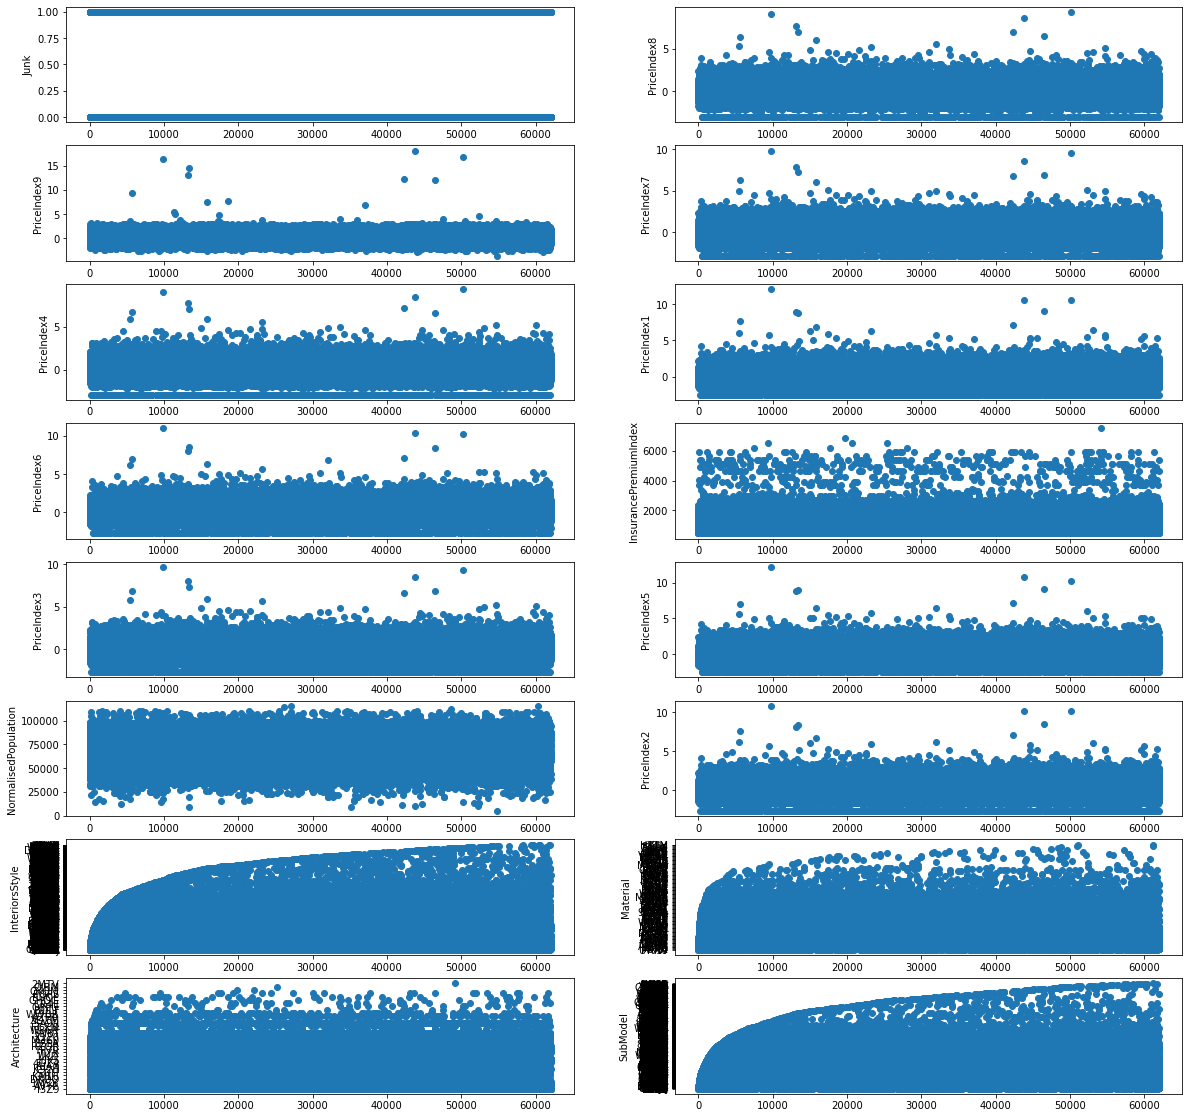

In [94]:
#vsss=pd.DataFrame('Junk','PriceIndex8','PriceIndex9','PriceIndex7',
      #'PriceIndex4','PriceIndex1','PriceIndex6','InsurancePremiumIndex',
      #'PriceIndex3','PriceIndex5','NormalisedPopulation','PriceIndex2')
svsv=list(train[['Junk','PriceIndex8','PriceIndex9','PriceIndex7',
                 'PriceIndex4','PriceIndex1','PriceIndex6','InsurancePremiumIndex',
                  'PriceIndex3','PriceIndex5','NormalisedPopulation','PriceIndex2',"InteriorsStyle",'Material','Architecture'
                ,'SubModel']])

col_index=0
plotrows=8
plotcols=2

fig,ax=plt.subplots(nrows=plotrows,ncols=plotcols,figsize=(20,20))

for rowcount in range(plotrows):
    for colcount in range(plotcols):
        ax[rowcount][colcount].scatter(y = train[svsv[col_index]],x=train.index)
        ax[rowcount][colcount].set_ylabel(svsv[col_index])
        col_index=col_index + 1

In [59]:
train.shape

(62035, 56)

In [74]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,PRIMEUNIT,InsurancePremiumIndex,Architecture,PriceIndex3,PriceIndex5,SubModel,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,missing,623,I3Z9,13108.0,9022.0,6E9G,MD,42077,2008,A,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,missing,1689,AVYP,3695.0,2742.0,FIVQ,OK,77258,2002,A,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,missing,2351,1M5X,7730.0,3768.0,4K0H,SC,94514,2004,A,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,missing,1933,DKOO,6290.0,5370.0,ZLXY,NC,82302,2002,C,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,missing,482,KML6,8583.0,4803.0,FIVQ,SC,49176,2007,B,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
train['RegionType'].value_counts()

A          51862
B           6861
C           3135
OTHER        172
missing        5
Name: RegionType, dtype: int64

In [60]:
train.loc[train['RegionType']=='missing','RegionType']='OTHER'

In [61]:
damn=pd.get_dummies(train['RegionType'],drop_first=True)
train=pd.concat([train,damn],axis=1)
del train['RegionType']

In [99]:
train['PRIMEUNIT'].value_counts()

missing    59092
NO          2886
YES           57
Name: PRIMEUNIT, dtype: int64

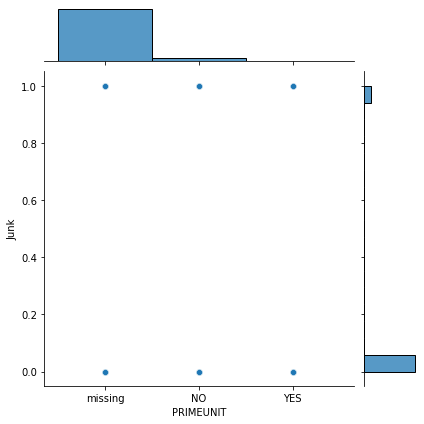

In [100]:
sns.jointplot(x=train['PRIMEUNIT'],y=train['Junk'])

In [62]:
del train['PRIMEUNIT']

In [78]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,InsurancePremiumIndex,Architecture,PriceIndex3,PriceIndex5,SubModel,State,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW,B,C,OTHER
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,623,I3Z9,13108.0,9022.0,6E9G,MD,42077,2008,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,1689,AVYP,3695.0,2742.0,FIVQ,OK,77258,2002,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,2351,1M5X,7730.0,3768.0,4K0H,SC,94514,2004,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,1933,DKOO,6290.0,5370.0,ZLXY,NC,82302,2002,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,482,KML6,8583.0,4803.0,FIVQ,SC,49176,2007,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [63]:
 #ImteriorsStyle, Material,Architecture,SubModel,State
del train['State']

In [80]:
train['InteriorsStyle'].is_unique

False

In [81]:
train['InteriorsStyle'].isnull().sum()

0

In [106]:
#pd.set_option('display.max_rows',None)
#train['InteriorsStyle'].value_counts()
#train.loc[train['InteriorsStyle'].value_counts()<1000]

In [82]:
train['InteriorsStyle'].nunique()

1036

<AxesSubplot:>

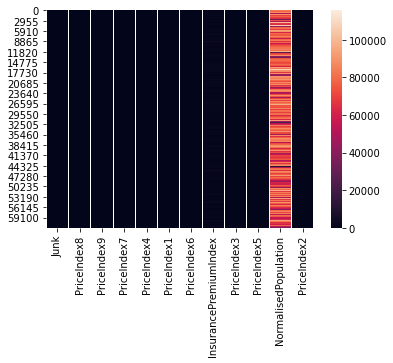

In [108]:
sns.heatmap(train[['Junk','PriceIndex8','PriceIndex9','PriceIndex7',
                 'PriceIndex4','PriceIndex1','PriceIndex6','InsurancePremiumIndex',
                  'PriceIndex3','PriceIndex5','NormalisedPopulation','PriceIndex2']])

In [83]:
pd.set_option('display.max_rows',None)
train['SubModel'].unique()

array(['6E9G', 'FIVQ', '4K0H', 'ZLXY', 'EFZH', 'WHBI', '0HMV', 'KT8F',
       '1515', 'ELJV', 'KTKJ', 'XHI5', '4VJF', '8YTZ', 'YQ71', 'BDFA',
       'TMA3', '4AL6', 'QW88', 'UA42', 'ARTJ', 'UTUM', 'KR72', 'JMQ2',
       'BGXW', 'JSXX', 'ASW2', 'IAQO', 'AVW5', 'Y29N', 'GXUO', '0BKK',
       'E6OX', 'TID0', 'PVH0', 'EW79', 'ONP1', '3JAH', 'J1Z8', 'HHKK',
       '9LOO', 'X6FH', 'CULD', '3IAL', 'R4SX', 'OFA3', 'T8Z7', 'WIQA',
       'RSHN', '0HHW', 'XIMM', 'MNF3', 'GR5P', '8DAV', 'DNBE', 'JXYG',
       '70VH', 'IANA', '9Q6I', 'E75G', 'KPC5', 'STJH', '7MRF', 'LI1R',
       '4ZWS', 'F82Y', 'P08R', 'LFG9', 'K8LM', 'RHPP', '9N33', 'T04H',
       'KJ5F', '4R79', 'HW8L', '9QMN', 'FG74', 'I6WB', 'OMD5', '9J9I',
       'MQAV', 'YXEO', '3Z1Z', 'RQ5Z', 'M0KE', '2BDJ', 'YO7K', 'HKYU',
       '9D54', '3BD8', 'HCBT', 'CR4E', 'L7G9', 'W1VN', 'FB0U', 'A9H6',
       'GVQO', 'YMIU', 'XML5', 'P0SX', 'NJ0J', 'BUNS', 'UDMC', 'L6FY',
       'OZMT', 'FKKG', 'DUB4', 'BQQL', 'ACJ6', '96Y6', 'JFYD', '9X8V',
      

In [84]:
#train.loc[train['SubModel']=="FIVQ",'SubModel']=
train['SubModel'].value_counts()

FIVQ    13008
KT8F     4012
UA42     3285
8YTZ     1894
GR5P     1089
K8LM     1009
TMA3      939
ASW2      937
XHI5      919
GXUO      897
E75G      796
IAQO      722
UTUM      720
EW79      584
XML5      544
T04H      479
X6FH      471
6E9G      452
P08R      440
FG74      438
4K0H      430
JXYG      418
OFA3      410
ONP1      398
AJTU      390
M81Y      381
3IAL      375
BNAA      371
8DAV      366
IANA      366
7529      359
JFYD      357
W8B5      351
BDFA      350
CULD      346
YQ71      345
WIQA      307
Y29N      307
AVW5      289
BUNS      285
ULSL      267
NCN6      266
4AL6      256
JPK5      249
0HMV      238
49HM      236
MQAV      235
4VJF      232
KXVY      230
JQH4      222
ARTJ      221
J1Z8      216
9QMN      216
LFG9      216
SBY1      211
3BD8      205
3JAH      200
0BKK      199
GVQO      196
R4SX      196
7MRF      194
RQ5Z      192
YO7K      188
3ZS5      183
4R79      183
4ZWS      178
DFW1      177
L7G9      176
UDMC      174
2BDJ      166
M0KE      161
K799  

In [64]:
nag=['6E9G', '4K0H', 'ZLXY', 'EFZH', 'WHBI', '0HMV',
       '1515', 'ELJV', 'KTKJ', 'XHI5', '4VJF', 'YQ71', 'BDFA',
       'TMA3', '4AL6', 'QW88', 'ARTJ', 'UTUM', 'KR72', 'JMQ2',
       'BGXW', 'JSXX', 'ASW2', 'IAQO', 'AVW5', 'Y29N', 'GXUO', '0BKK',
       'E6OX', 'TID0', 'PVH0', 'EW79', 'ONP1', '3JAH', 'J1Z8', 'HHKK',
       '9LOO', 'X6FH', 'CULD', '3IAL', 'R4SX', 'OFA3', 'T8Z7', 'WIQA',
       'RSHN', '0HHW', 'XIMM', 'MNF3', '8DAV', 'DNBE', 'JXYG',
       '70VH', 'IANA', '9Q6I', 'E75G', 'KPC5', 'STJH', '7MRF', 'LI1R',
       '4ZWS', 'F82Y', 'P08R', 'LFG9', 'RHPP', '9N33', 'T04H',
       'KJ5F', '4R79', 'HW8L', '9QMN', 'FG74', 'I6WB', 'OMD5', '9J9I',
       'MQAV', 'YXEO', '3Z1Z', 'RQ5Z', 'M0KE', '2BDJ', 'YO7K', 'HKYU',
       '9D54', '3BD8', 'HCBT', 'CR4E', 'L7G9', 'W1VN', 'FB0U', 'A9H6',
       'GVQO', 'YMIU', 'XML5', 'P0SX', 'NJ0J', 'BUNS', 'UDMC', 'L6FY',
       'OZMT', 'FKKG', 'DUB4', 'BQQL', 'ACJ6', '96Y6', 'JFYD', '9X8V',
       'DZ5Y', '36O5', 'KXVY', '1BAO', 'JDPJ', 'YIDI', 'J65C', 'U3BX',
       'PFJY', 'P8QS', 'Z1F9', 'ULSL', '6G22', 'SKL5', 'ET7S', 'JPK5',
       'IOW8', 'BNAA', 'SVNZ', 'M81Y', 'PS2G', 'VZO3', 'KBOP', 'K799',
       'C3YE', '8KXL', 'GOJ2', 'DFW1', 'ZB10', '2VZ8', 'T8WE', 'O7OJ',
       'YOZF', 'KZ70', 'G8M1', 'BD9K', '4VAQ', '3U8O', 'TTCV', 'AHKJ',
       'FV6H', 'CPYM', 'KKL3', 'AJTU', 'Q95Y', '49HM', 'IDS7', '8K87',
       'O0I0', '5TGH', 'F4MD', 'VBQ7', 'OM13', 'SBY1', 'N24U', '16UX',
       'HNB6', 'K9MV', 'IHCG', '7529', '83YQ', 'HVE1', '526I', '9VPY',
       'DJIS', 'HDMO', 'GQ1W', 'VMTD', 'K288', '3QPL', 'DWBT', 'UT1K',
       'JTV3', 'DXBO', 'W8B5', 'ARDK', 'NCN6', 'LU16', 'X7IX', '4BZI',
       'X7KR', 'E108', 'PDW2', 'MDVK', 'X07E', '5PCT', 'CL09', 'Y52D',
       'KMK9', 'W859', '82FV', '4ZC9', 'F8LF', '2L2B', 'XY55', 'SKLP',
       '14CA', 'KBN3', 'U4M8', 'OHOZ', 'L1HL', 'BQ3D', '3ZS5', 'T9CY',
       'G8R1', 'EO5P', 'EHRO', 'QTM7', 'PG5V', 'XDZM', '3SD4', '999G',
       'AV95', 'XBY4', 'ET4R', 'Z9C2', 'XQZZ', 'JQH4', '6MSQ', '7XFG',
       'NKOQ', 'GCO1', '7CEY', 'A98F', 'NH0V', '5OCN', 'CCKR', 'INDE',
       '7XTI', 'G251', 'MBSS', '0U0W', 'ESPP', 'V6YZ', 'DM8R', 'DQ2J',
       'RB3Z', 'KFQD', 'WFS6', '1HJE', 'PQP2', 'IUG7', 'D0L9', '5DYN',
       'QK88', '1E2H', 'I2BO', 'DT7O', 'VZ6Y', 'P63U', 'G0DI', 'E9KT',
       'ZXO4', 'ZB2Q', 'TWO7', 'FG5X', '6H6M', '2705', 'EXIV', 'S3LY',
       'WWBR', 'I052', 'SPVD', 'V42X', 'Z4IQ', 'CUHZ', 'OG0M', 'UZIC',
       'LAPW', '7T4M', '90GC', '53L0', 'RVRD', 'NZ20', '75MF', 'WDFK',
       '9W88', '1X3E', 'KRCL', 'WKHY', 'V8OZ', 'EQIX', '67C9', '9PWM',
       'M3DW', 'T9TS', 'F2GD', 'Y721', 'YNFK', 'I8DX', 'CP7E', 'FP12',
       '1UR1', '6J28', 'D1LK', '30JO', 'QTHX', '345H', 'MR68', 'IQT8',
       'PNKX', 'KG7M', 'I2LM', 'OV0S', 'YAEP', 'AULC', 'PDVP', '9R9U',
       'E31T', '7KD7', 'GFV7', 'AZMX', 'R8Z6', '94JK', '739L', 'J6M6',
       'BU6J', 'Y5H9', '0A7V', 'BXRB', 'LAO2', 'LL5I', 'TGTY', '2GZX',
       'XK6A', 'CPEO', 'PPKX', 'EQTN', 'NCNR', 'CZIJ', 'JATA', 'EEM4',
       'SST2', 'OYRJ', 'RHUT', 'K4GT', 'P1SU', 'FJT6', '6LK6', '6BFA',
       '0FUR', 'QSSK', 'L6PT', 'G3DT', '5GFB', 'K83S', '8OGW', 'IJLQ',
       'LOUZ', 'GQ5I', 'IJWV', '4CSO', 'GRQG', 'FKGA', 'L2GZ', '0YQK',
       'OB4B', 'N03Z', 'VUGR', '2SKD', 'QLT1', 'YHDT', 'EAI4', '7RMA',
       'D4S5', 'K3RZ', 'DZH4', '3JL2', 'ODNT', 'ORM1', '7PZ6', '6C1E',
       '3S5S', 'LFCT', 'WGF3', 'DN4U', 'PO7O', 'XRNH', 'TNF9', 'L51A',
       '0ZQL', '27ZL', '3ES7', 'H42S', 'M42V', 'W4RV', '9XUI', '7RVG',
       '8VPY', 'FXPC', 'CK85', 'B5NS', 'VDJI', '17SM', 'ZLM4', 'E6RO',
       'PGX1', 'G74Y', '138H', 'J81V', '8JP0', 'VNNT', '8O4D', 'MWXI',
       'QO6K', 'Y9HA', 'CKMQ', '7V19', 'SLFI', 'USS6', '46AR', 'GJ34',
       '2SK5', 'BWNC', '7FC4', '8UTN', 'BNOM', 'MG1Y', '10VF', 'HXVS',
       'CQVA', '2VBD', 'ZSV4', 'FJAF', 'QNA9', '04N2', 'N731', 'LLKM',
       'QQVE', 'G6N2', 'P5YV', '8GHH', '9D84', '6ZEU', 'V0N6', '4O9N',
       'RLVQ', 'PBZL', '642N', '5HCW', 'NKYP', 'XLKL', '8BYG', 'QHCZ',
       '0C21', 'JP7X', 'SJNB', 'NZ4S', '8SV6', '6V6X', '9UA7', 'H40G',
       'PDS2', '9QC9', '0GVV', '2I46', 'DUP1', 'D288', 'EXGW', 'ZL6O',
       '7WX0', 'KXNX', '9R3X', '8CYB', '5TYG', 'FTW1', 'RVRQ', 'R1RX',
       '5ZWE', '5WCK', 'EWTN', 'KNJU', 'B1XS', 'RQFV', 'WDXW', 'WUUO',
       'NZDV', '3FWW', '8TOS', 'BTA4', 'I5BK', 'JNXD', '6RF1', 'WRYP',
       '2EAG', 'GTOL', '2L32', 'Z1DO', 'DTU8', '3IT3', '5AUW', 'SGYX',
       'CJJL', 'APZN', '7VGX', 'Z1VB', 'EBVM', '589A', 'WQ7X', '08EB',
       'W5W1', 'DAXP', 'R7C0', '0G33', '8TL2', '36L6', 'LWMR', 'G5DT',
       'VISH', 'CK53', 'PFL7', '9RI5', 'SFH2', '3322', 'F0PF', 'B8Z6',
       '3D4H', 'SWGM', 'K3OZ', 'UZB9', 'P52S', 'XIO0', 'PR25', '8H0X',
       'BX7I', 'VYQQ', 'BKYT', 'LGFR', 'OBWY', 'KQZ6', '3DR3', 'SX2V',
       'JX1A', 'WGOI', '8780', '3RD7', 'TPD6', '82RU', 'ZW09', 'NXI4',
       'RJJK', '0HKC', 'Y7CE', '313G', 'ZUFN', '5TI8', 'NA6A', '318L',
       'N5E0', 'ME7U', 'NBSW', 'SDN5', '534Z', 'PIMH', 'OSHI', '39NI',
       'AFQL', '35YH', 'ZU81', '34F0', 'ZIRY', 'UAAS', 'N51O', '59L2',
       'V3Y1', '02IO', 'OP6Y', 'W0Q3', 'Q4MS', '2BOJ', '9JBO', 'GH9H',
       '3YWU', 'HB8A', '1CE8', '6CUP', 'H26C', 'VFFE', 'S2DI', 'D5FB',
       'XJ2O', 'ZL1X', 'ACWG', 'YU56', 'VKZG', 'UC6S', 'AK3B', '7I48',
       '55T2', 'B723', 'JK9T', 'XUTR', 'ZKSU', 'TUGA', 'ZQZ3', 'ERMF',
       '3PT6', 'AZGA', 'T0GD', 'XWKM', 'QCRS', 'U1IU', 'GN3H', 'N9KT',
       'DKSK', 'LPEF', 'LIGY', 'DXV6', 'VCET', 'Y5K5', 'QDMY', '24RV',
       '5NHA', '50RO', '8FGA', 'F5QZ', '6FUD', 'LXDM', 'U54X', 'EGLC',
       '2O59', 'DFPB', 'MQLY', '13CD', 'HK8Y', 'MQUC', '7AWQ', 'KO65',
       '1VJB', 'D9SO', 'R7QZ', 'LOY4', 'H9ST', '9D5W', 'W865', '1EXN',
       'F6H6', 'D50L', 'SI6Y', 'YBMX', 'ELPH', '5PKR', 'RXKT', 'BEOM',
       'HBPY', '4NYL', 'BK1K', 'DIFN', 'Y5SP', '7PS0', '5G3G', 'P4ZQ',
       '6HWW', 'LBK3', 'JXAI', 'W3N8', '0UP3', 'NOQI', 'LBXJ', 'NKUV',
       '1L66', 'XV6R', 'GCQ0', 'QQ6I', 'OQ0V', '5K9J', 'FGMU', 'XF80',
       'HQH8', 'IWPS', 'K2BP', '9WQQ', '3K9R', 'EU0Z', '7SZT', 'L4N9',
       'CBAZ', 'CWWG', 'SMMM', 'ZKQ8', 'Y4OH', '84VD', '3MP1', 'K2R5',
       'HOPX', 'K3RX', '6XR0', 'CCAM', 'INKW', 'LWXY', 'DSI4', 'K8V1',
       'QD2H', 'F9YB', 'NPHX', 'I00H', 'Q63E', 'A0AU', '98Y9', 'JT7Q',
       'E06C', 'U35S', '9YGP', 'WK9W', 'RHYH', '8AH8', 'E1KE', '4SIA',
       '4EQD', '06PE', '53OG', 'MF6O', 'XWU7', 'Z96S', 'I9ZN', 'A81B',
       'W5OD', 'MMX8', 'TRWT', '2SOM', '7PMP', 'B4ZR', 'D7YX', '49YK',
       'WB8U', 'D6LI', 'JXQZ', 'MXEC', 'IYNQ', 'SXUO', '16WU', '991Y',
       'HV5A', 'G7EV', 'EVC4', '4W5T', 'RRV4', '1Q1X', 'ZKP4', 'R9G6',
       '5XX9', 'W845', 'VW1S', 'IVM2', 'EC97', 'VY96', 'JZQB', 'OCZ2',
       'WMNR', 'HLME', 'HA13', '7N9Y', 'TSBR', 'NDQI', '66EU', 'P7YX',
       'DDAT', 'QOXF', 'EJEH', 'FAFQ', '46BE', '32EN', 'HO2S', 'U01E',
       'TYJR', 'OW2N', '7D8E', 'KDNK', 'RA3V', 'AZOQ', '3BOV', 'AGNE',
       '689V', 'QJFN', 'UBFS', 'UG5B', 'CRRL', 'OCY4', 'H2EU', 'G1H2',
       'K5NG', 'G6G6', 'XUPK', '2I0J', 'O8PU', '74II', '8K2Q', '1OA8',
       'D09A', 'O5VQ', '3AAC', 'J3L3', 'XEDB', 'TTYX', 'UD4L', 'K4P2',
       '4G4C', '128Q', 'OTWW', 'AV7L', 'Y3GL', 'HBRI', '070N', 'H5NT',
       '26CF', 'GJVC', 'VYVW', '9YAD', 'BTN5', 'OKEF', 'Y3KH', 'Q4IC',
       'QBXS', '0TXX', 'D8YQ', 'AXKW', 'HJSA', 'XG47', '84NQ']

In [65]:
train["SubModel"]=train['SubModel'].replace(nag,np.nan)

In [66]:
ngg=pd.get_dummies(train['SubModel'],prefix='SubModel',drop_first=True)
train=pd.concat([train,ngg],axis=1)
del train["SubModel"]

In [88]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,InsurancePremiumIndex,Architecture,PriceIndex3,PriceIndex5,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW,B,C,OTHER,SubModel_FIVQ,SubModel_GR5P,SubModel_K8LM,SubModel_KT8F,SubModel_UA42
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,623,I3Z9,13108.0,9022.0,42077,2008,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,1689,AVYP,3695.0,2742.0,77258,2002,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,2351,1M5X,7730.0,3768.0,94514,2004,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,1933,DKOO,6290.0,5370.0,82302,2002,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,482,KML6,8583.0,4803.0,49176,2007,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [115]:
##Architecture
train['Architecture'].unique()
#ngg=pd.get_dummies(train['SubModel'],prefix='SubModel',drop_first=True)
#train=pd.concat([train,ngg],axis=1)
#del train["SubModel"]

array(['I3Z9', 'AVYP', '1M5X', 'DKOO', 'KML6', 'STJH', 'K92H', 'RIAX',
       '4GZ4', 'YIK5', '1IKD', '7IYX', 'TP7R', 'RZOR', '8SPA', 'M3C0',
       'X120', '5NBT', 'W86R', 'FCXM', '5A9R', 'XDZM', 'AZHP', 'WWBR',
       'BOLF', 'O8PU', 'CR4E', 'GHDG', 'R0QP', 'PQP2', 'OYQM', 'OJBM',
       '2MTV'], dtype=object)

In [116]:
train['Architecture'].value_counts()

YIK5    14646
TP7R    10938
I3Z9     9584
AVYP     7543
1M5X     3658
4GZ4     2095
7IYX     1846
RZOR     1753
8SPA     1572
K92H     1382
KML6     1131
M3C0      956
5NBT      896
RIAX      840
STJH      790
X120      607
5A9R      553
DKOO      427
AZHP      209
FCXM      117
1IKD      112
WWBR      102
W86R       81
XDZM       35
R0QP       34
O8PU       29
CR4E       26
BOLF       25
GHDG       23
PQP2       21
OYQM        2
2MTV        1
OJBM        1
Name: Architecture, dtype: int64

In [67]:
sltd=['1IKD','W86R', 'FCXM', 'XDZM', 'AZHP', 'WWBR',
       'BOLF', 'O8PU', 'CR4E', 'GHDG', 'R0QP', 'PQP2', 'OYQM', 'OJBM','2MTV']
train["Architecture"]=train["Architecture"].replace(sltd,np.nan)

In [68]:
train["Architecture"].value_counts()

YIK5    14646
TP7R    10938
I3Z9     9584
AVYP     7543
1M5X     3658
4GZ4     2095
7IYX     1846
RZOR     1753
8SPA     1572
K92H     1382
KML6     1131
M3C0      956
5NBT      896
RIAX      840
STJH      790
X120      607
5A9R      553
DKOO      427
Name: Architecture, dtype: int64

In [69]:
domy=pd.get_dummies(train["Architecture"],prefix="Architecture")
train=pd.concat([train,domy],axis=1)
del train["Architecture"]

In [92]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,Material,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,InsurancePremiumIndex,PriceIndex3,PriceIndex5,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex2,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW,B,C,OTHER,SubModel_FIVQ,SubModel_GR5P,SubModel_K8LM,SubModel_KT8F,SubModel_UA42,Architecture_1M5X,Architecture_4GZ4,Architecture_5A9R,Architecture_5NBT,Architecture_7IYX,Architecture_8SPA,Architecture_AVYP,Architecture_DKOO,Architecture_I3Z9,Architecture_K92H,Architecture_KML6,Architecture_M3C0,Architecture_RIAX,Architecture_RZOR,Architecture_STJH,Architecture_TP7R,Architecture_X120,Architecture_YIK5
0,0,6LLJ,14674.0,UT7W,8270,13143.0,0,14224.0,9217.0,10387.0,623,13108.0,9022.0,42077,2008,2,10692.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,XZ9F,4172.0,PRN0,3890,3461.0,0,4404.0,2958.0,3400.0,1689,3695.0,2742.0,77258,2002,7,3615.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,QWEV,8210.0,A9RA,5900,6922.0,0,8952.0,4568.0,4862.0,2351,7730.0,3768.0,94514,2004,6,5805.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,MK2K,7309.0,RRJQ,7460,6300.0,0,7460.0,5361.0,6305.0,1933,6290.0,5370.0,82302,2002,7,6444.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,GK4G,9182.0,HE5A,6400,8330.0,0,9846.0,5428.0,5718.0,482,8583.0,4803.0,49176,2007,3,6286.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [121]:
train['Material'].unique()

array(['UT7W', 'PRN0', 'A9RA', 'RRJQ', 'HE5A', 'ARWN', '4ZHP', '4VDP',
       'OZMT', 'C8A4', 'FVEJ', '1MJN', 'IKAF', 'NYFD', '1WN4', 'NCCU',
       'ZCI3', '2NHM', 'L54M', 'H5XT', '55S7', 'X7IX', 'MCPM', '5GAZ',
       '5P9Q', 'JD5J', 'JUNM', '1PUV', '1QJ5', 'Z9JM', 'NV0M', '16WS',
       'R59D', 'GG8E', 'WIQA', '3F8B', 'WO6R', 'IYF6', '8CYR', 'BQST',
       '1AKX', 'LQY2', 'OV0S', 'Y68H', '9TQI', 'ZB2F', 'HKYC', '8RX6',
       '9CWN', 'CCVQ', '3O4A', 'K5JL', 'XTGN', '9VVT', 'DOA1', 'XJ9B',
       'ZSQ3', 'YX4W', 'Z06V', 'JUQY', '5Q4S', 'S40L', 'J99O', 'W3HS',
       '3WH2', 'LMX8', '5BNO', 'MWVU', 'NZ30', '38MX', 'VGUZ', 'DJOP',
       '3XP8', 'W1XV', 'NJYN', 'ZPKB', 'EU0Z', '95GY', 'DCP3', 'JK9T',
       'G3IG', 'OIH8', 'YWK8', '3APS', '0K5R', '1602', 'V1NL', 'G74Y',
       'NR8Q', '3COR', 'IUFQ', 'ZRYR', 'HJIG', 'F473', 'R7DB', 'ZVY4',
       'PUFC', 'FK9R', 'YGDD', 'N5PK', '2NJS', 'FMFF', 'GM2Z', 'C9T4',
       '8VX0', 'IVV6', 'PFJY', 'UT5O', 'MS1W', 'HFOC', 'GB2J', 'UZH1',
      

In [70]:
astra=['UT7W','4VDP','FVEJ', '1WN4','L54M', '5GAZ',
       '5P9Q', 'JUNM', '1QJ5', 'Z9JM', 'NV0M', '16WS',
       'R59D', 'GG8E', 'WIQA', '3F8B', 'IYF6', '8CYR', 'BQST',
       '1AKX', 'LQY2', 'OV0S', 'Y68H', '9TQI', 'ZB2F', 'HKYC', '8RX6',
       '9CWN', 'CCVQ', '3O4A', 'K5JL', 'XTGN', '9VVT', 'DOA1', 'XJ9B',
       'ZSQ3', 'YX4W', 'Z06V', 'JUQY', '5Q4S', 'S40L', 'J99O', 'W3HS',
       '3WH2', 'LMX8', '5BNO', 'MWVU', 'NZ30', '38MX', 'VGUZ', 'DJOP',
       '3XP8', 'W1XV', 'NJYN', 'ZPKB', 'EU0Z', '95GY', 'DCP3', 'JK9T',
       'G3IG', 'OIH8', 'YWK8', '3APS', '0K5R', '1602', 'V1NL', 'G74Y',
       'NR8Q', '3COR', 'IUFQ', 'ZRYR', 'HJIG', 'F473', 'R7DB', 'ZVY4',
       'PUFC', 'FK9R', 'YGDD', 'N5PK', '2NJS', 'FMFF', 'GM2Z', 'C9T4',
       '8VX0', 'IVV6', 'PFJY', 'UT5O', 'MS1W', 'HFOC', 'GB2J', 'UZH1',
       'R6IP', 'M81Y', 'BGZR', 'CTXL', 'TV35', 'X64F', 'EW79', 'CEAC',
       'F0PW', 'VMM3', 'X5OI', 'JA49', '6EYE', 'VBPN', 'OETZ', '0EFS',
       'JXAI', '5NLN', '0J0F', 'ZTGX', '8ZEX', 'HTTM']
train['Material']=train["Material"].replace(astra,np.nan)

In [71]:
train['Material'].value_counts()

PRN0    11909
C8A4     8657
ZCI3     7938
NYFD     3228
X7IX     2988
IKAF     2053
HE5A     1993
4ZHP     1911
RRJQ     1806
H5XT     1187
2NHM     1153
OZMT     1136
ARWN     1049
WO6R     1021
NCCU      817
JD5J      751
1MJN      712
A9RA      696
1PUV      668
MCPM      658
55S7      610
Name: Material, dtype: int64

In [72]:
dommy=pd.get_dummies(train['Material'],prefix='Material',drop_first=True)
train=pd.concat([train,dommy],axis=1)
del train['Material']

In [73]:
train.shape

(62035, 96)

In [126]:
print(train['InteriorsStyle'].unique().tolist())

['6LLJ', 'XZ9F', 'QWEV', 'MK2K', 'GK4G', 'UN74', 'NMSK', 'K3BB', '7CIG', 'CNWW', 'IPUS', '93LE', 'MTA3', 'B29I', 'CVUI', '7NL9', 'ARWN', 'DUFA', 'RELA', 'YDVX', 'SE01', 'NIBY', 'DT7U', 'DY0D', 'RZ14', 'V3Y1', 'AZMX', 'F59U', 'MR68', 'ARIH', 'TJF5', 'AU91', 'MLUU', 'APX3', 'VNNT', 'AMQS', 'RCQE', '5KS5', 'J20T', '2XWO', 'UM2V', '7R8J', 'N16H', 'H048', 'DYK9', '6N4N', 'KVES', 'SNKW', 'W8B5', 'CNKZ', 'GVY0', 'YBQJ', 'K3XP', 'OIBC', 'X07E', 'SWDG', 'BX7I', 'Y4AM', 'T67A', 'DUWU', '6UCD', 'WEGU', '2TEG', 'QS4E', '3MP1', 'MOGB', 'YK1V', '0PTF', 'W0IG', 'EIAH', 'FRAJ', 'ISY8', 'I45U', 'OA2Z', 'I1SE', '9TTE', 'V584', 'TDTU', 'T0CD', 'WD8F', 'H1CI', 'U6SG', 'YOC7', '8GE9', '3RJ4', 'BN7D', 'EBVM', 'KML6', 'XX6G', '56VO', '4FTH', 'ELJV', '1PJ4', 'MEB0', 'CRVM', 'JL8L', 'BCBK', 'SDT2', 'QHE4', 'KXN7', '7KCI', 'KHJD', 'LWXY', '7857', 'TD6S', 'ZFT5', 'DL7Z', '9TQI', 'EWU9', '9O7B', 'V5PX', 'FXPC', 'A7XW', 'XNJR', 'D2DH', '918O', 'S3ME', 'RXC1', '0P4O', 'M81Y', '7RB6', 'ZX8N', '67XH', 'HW87', 'QD0H',

In [74]:
cang=['6LLJ', 'XZ9F', 'MK2K', 'GK4G', 'UN74', 'NMSK', '7CIG', 'CNWW', 'IPUS', '93LE', 'MTA3', 
      'B29I', 'CVUI', '7NL9', 'RELA', 'YDVX', 'SE01', 'NIBY', 'DT7U', 'DY0D',
      'MR68', 'ARIH', 'TJF5', 'AU91', 'MLUU', 'APX3', 'VNNT', 'AMQS', '5KS5','UM2V', 
      'N16H', 'H048', 'DYK9', '6N4N', 'KVES', 'SNKW', 'W8B5', 'CNKZ', 'GVY0', 'YBQJ', 'K3XP', 'OIBC', 'X07E', 
      'SWDG', 'BX7I', 'DUWU', '6UCD', '2TEG', 'QS4E', '3MP1', 'MOGB', 'YK1V', '0PTF', 'W0IG',
      'EIAH', 'FRAJ', 'ISY8', 'I45U', 'OA2Z', 'I1SE', '9TTE', 'V584', 'TDTU', 'T0CD', 'WD8F', 'H1CI', 'U6SG', 'YOC7',
      '8GE9', '3RJ4', 'BN7D', 'EBVM', 'KML6', 'XX6G', '56VO', '4FTH', 'ELJV', '1PJ4', 'MEB0', 'CRVM', 'JL8L', 'BCBK',
      'SDT2', 'QHE4', 'KXN7', '7KCI', 'KHJD', 'LWXY', '7857', 'TD6S', 'ZFT5', 'DL7Z', '9TQI', 'EWU9', '9O7B', 'V5PX',
      'FXPC', 'A7XW', 'XNJR', 'D2DH', '918O', 'S3ME', 'RXC1', '0P4O', 'M81Y', '7RB6', 'ZX8N', '67XH', 'HW87', 'QD0H',
      'DPIW', 'BYZF', 'SWM0', 'CSQE', '2UUF', 'LPCE', 'SVNZ', 'FOY0', '38WH', 'GNM2', 'Y9U1', '5YRM', 'OZVR', 'HX6A',
      '7IDF', 'R2GY', '53OG', 'VQNR', '56VV', 'KN4S', 'I7GR', 'XRNH', 'YET9', '0VBX', 'V6YZ', '27O7', 'HSYT', 'G6JQ',
      'E358', 'SQI6', 'DZKM', 'Z4PX', 'QEXX', 'IBJG', 'UTEG', 'HZZU', 'GRWS', 'LDF1', '9CX6', 'XI4Q', 'RY2P', 'IUPW',
      '98SV', 'CBQW', 'KAAR', 'LOA2', 'DLFA', 'V6T4', 'S6OZ', '3H4M', 'R97F', '24WO', '439A', '1DNQ', '2705', '9XC2',
      'L615', 'FSJW', 'V2MT', 'YSKW', 'N731', 'ZHE1', 'N5E0', 'WQHV', 'V9L4', 'TVQO', 'OAL8', 'P932', 'RMYY', 'YAL9',
      '9F84', 'J0SD', '7I48', 'X1W2', 'G0KC', '8ID9', 'CUBU', '2ONS', 'AU5A', '7CB4', '7I8M', 'XTGN', 'J4FZ', 'SR8C', 'T4MS',
      'F5LX', 'ENH7', 'S2PA', '6RUI', '9SCE', 'WCM1', 'E8UR', 'EICU', '6LR6', '14DE', 'GAFH', 'YHTQ', 'TPE0', 'P9OV', '5XM7',
      '3OAE', 'DHGO', 'RXQB', 'U2RZ', 'JHBF', 'JF2X', 'AI9N', 'CKUI', 'QGMD', 'TRRK', 'R9VM', 'IZBK', 'BG9J', 'RPJS', 'LXMS',
      'XCOA', 'O98V', 'X7EG', 'HOPX', '66CU', 'EC3C', 'ZKWL', '43MM', 'M3DW', 'J8VT', '0L1M', '5B3J', 'AT3I', 'XJBU', '3L4B',
      'L89I', 'WK0V', 'I27V', 'E6M1', 'JAHA', 'D09A', 'DF95', '9Q6I', 'LVHP', 'K9X1', 'WJ9C', 'FBYH', 'LDGU', 'ANUW', 'JD5J',
      'PQP2', '9VPY', 'XSH5', 'RUTF', 'N5DI', '7EY5', 'JT5U', '9HX9', 'Q1E8', 'NXIT', '1GHZ', 'KC4E', '7MGK', 'JSON', 'BWNG',
      'NWHI', '3U8O', '2GZZ', 'ACJ6', 'D5T6', 'BM1P', 'HQC2', 'IHNF', 'XFS8', 'M03Y', '7AGH', '30JO', '3PBF', '06M5', 'QDZ1',
      '5C2Y', 'SKL5', 'VKZG', 'J7Q9', 'ABBY', '8700', 'JSJW', '5UZO', 'R816', '0MJJ', '5QFI', 'U27C', 'OR99', '3OV2', '2ELR',
      '8HA1', 'FUK2', 'IKH7', 'OB7P', '0UL2', '61PR', 'I6WB', '3X16', 'O9O1', 'VPZ3', '5KBG', '1WN4', '5E1Q', '4S9Z', 'YWK8',
      'B5KS', 'Y1SE', '5IYU', '4QJJ', 'K4NL', 'L5OM', 'UC1V', 'GN6L', 'EHKJ', 'FL0M', 'JPK5', '21SH', 'OAB4', 'UXNU', 'DKSK',
      'CY3Z', 'EOLE', 'Z7PJ', 'E1TH', 'FFYL', '4HU2', 'ZBZ4', 'WVS2', 'JOMS', 'EN73', 'X4YR', 'HD42', 'LOFE', 'UWP3', 'OGAC',
      'HO2S', 'YY8T', 'VJX1', 'XCLR', 'XFWR', '1N0V', '9TKP', '7W8U', 'LSNV', 'L9JV', 'WCQE', '8UET', 'V20J', 'KVY4', 'Q0ZN', '8CF3', 'JGTS', 'IC4M', '972Q', '15SE', 'SXJ8', 'A53L', 'Z14K', 'CXQ1', 'DFWJ', 'OXEE', '2X6L', 'RQ5Z', '8J96', '8STC', '4IZC', '9AKO', 'OFSU', 'SSBZ', '4SIA', 'FPMX', 'HF8L', '32SK', 'TPS8', '11J3', 'KRRJ', 'RSW7', 'BKYF', '9AJU', 'IFYO', 'FCDD', 'XIC9', 'P0H3', 'RUSZ', 'CZQI', 'NNT9', 'BZ0Y', 'HZ0Y', '68VG', 'VZ6Y', 'DSMX', 'IKW1', '00G0', 'W62B', 'LLKM', 'NH7W', 'IS3U', '7MF7', 'E6KW', 'TJA5', 'TPPH', '7DIK', 'G2L7', '61ZW', '3X1V', 'NRXS', 'PCZ9', 'P4IS', 'OCYD', '8PIT', 'V3MR', 'N00G', '29JV', 'MC4T', 'IEC8', '73TK', '97DP', '9MRR', 'ZBSL', '7IRK', 'L8YR', 'L5TY', 'CSTR', 'ERLO', 'XD1H', 'R2ZM', 'CJID', '1D1P', 'U6JF', '3VL2', '84OY', 'J5LR', 'FITD', 'EXIV', 'GGIA', 'OLMK', '16WS', 'NFQW', 'FGE1', 'XV6D', 'UD4L', 'QVOM', 'ZDLX', 'S9PW', 'ZDKF', '87HV', 'CDYC', 'HHFX', 'KJP7', 'S5HG', 'R2MP', 'GMKT', '80W0', 'FZV9', '2DPF', '33RF', 'GRST', '2ECC', 'HBPY', '0LXU', 'PPKX', 'B7N1', 'EDH3', 'OKC1', 'P45T', 'ZWGI', 'EW7A', 'TUQH', '74Y9', 'YHDT', '24AN', '71NH', 'OI6J', 'FP2M', 'SHRY', 'NKUV', 'LYCL', 'BK31', '715P', 'TX9G', 'CN91', '07LY', 'LQA6', 'FJAF', 'P4TB', 'W7M9', 'DV8M', '9UX4', 'MM7L', 'TOD3', 'D288', 'X192', 'Q9ME', 'KF7W', 'J4E1', 'FND7', '2DIX', '09YA', 'XSRD', '2N85', 'L9NP', '4S8X', '14CR', '4BDY', 'UELX', 'QRP2', '6LPL', '8UX0', 'YABX', '9AGU', 'Z8IW', '185T', 'TM8P', 'SOZJ', '7ANL', 'UK9O', 'ANRD', '0A6Q', 'F7ME', 'Z0Q0', '8RX6', 'OZDY', 'CE1R', 'MEA3', '1TC4', 'C2EX', 'DTTA', '0TT8', '158T', 'QPFP', '3ZVK', '4MMD', 'LI6R', 'DUIT', 'IW1S', '78V3', 'B2QW', 'TNOA', 'K03L', 'CUEK', 'EGLC', 'GLKT', 'SC6F', 'UNPB', 'JJ4D', 'NS0L', 'B5R9', 'ABS1', 'NC73', 'I560', 'QRPK', '7F6L', 'E6OX', 'E00P', 'FMZK', 'A86L', 'SDEF', 'A269', 'VHZW', '2Y3O', '3ITC', 'E0S8', '2M31', '78TD', 'DLEI', '4VGN', '1NA6', 'GX96', '8K7T', 'BKMW', 'YTEP', 'UAFB', '63W0', 'AOSJ', 'X0S6', '8CAH', '51L1', 'XMHK', 'I052', '585O', 'V9Y5', 'Y1G5', 'RZ5K', 'QWV3', '2UWI', '9S74', '1EZQ', 'PNKX', 'ML4J', '65T0', 'DCBO', '2S5L', 'AF6G', '64MJ', 'XLQA', '4B9T', 'IHQ5', 'QY1O', 'XPKO', 'LKUU', '707O', 'C3ZC', 'G6ZG', 'WCE5', 'S199', '0P8D', 'CNJP', '21J1', 'ZATJ', 'IDH2', 'RVA3', 'ASYT', '3QDH', '745J', '9609', '6RSQ', '2796', 'CAX0', 'FQQH', 'TI7G', 'VXJL', 'K4VL', 'H2ZL', 'YJ8D', 'JNXK', 'TXWM', 'FP51', 'PIIF', '7BXA', '5W68', 'SOB4', 'KX88', 'XEWQ', 'XHNV', 'BECH', '5CUS', '3J7Z', 'VH1M', 'DA52', 'RU4P', 'OS2H', 'VM5Y', 'XGCU', '0S2O', 'TUEJ', 'ZB1W', 'GPO9', 'HH1E', '7XFG', '2F11', 'FJT6', 'Q3TB', 'BL1Y', '80K8', 'JTLL', '7DAG', 'T5J8', 'G9UU', 'TEV2', 'XDAQ', 'W3SL', 'M6EO', 'GCR2', '3MG7', 'NUYJ', '4G2J', 'F9V7', 'HFAW', 'E6PG', 'PMRQ', '1I5A', 'QTHX', 'G6OR', 'OV9N', 'LQGU', 'TWO7', 'TY03', 'Y49I', '9WQQ', 'G3IG', 'A6YA', 'B0T4', '0BJ2', 'QEF5', 'ZP41', '31RW', '0K8S', '44ZU', 'CNV1', '5X43', 'EEVJ', '178D', 'FHV1', 'WHQR', 'GRSZ', '6JDA', '1S1E', 'RRJQ', 'RYJQ', '7ZP4', 'AT7B', 'U20M', '0Q6J', 'ELBO', '4Y15', 'Y4HO', '7XTI', 'BBZL', 'EGLJ', 'YWYS', 'FV6H', 'YOS8', '1M5X', 'ORUA', 'YOZF', 'INF4', 'JQ5D', '86JJ', 'Z7C4', 'A8GV', 'KT0B', 'L5C7', 'JQW6', 'OXDU', 'HCEP', '52PA', 'L6GK', 'KDNI', '6WPF', '3K9R', 'ZKIY', 'FI8F', 'Z06V', '54J5', '1YZC', 'XISC', 'IQT8', 'AFQL', 'K654', 'P5KB', 'HHBM', 'NJYN', 'KBEE', 'A2J7', '2PSY', 'R6MU', 'PW0S', 'XPID', '55S7', 'DGKF', 'T9JK', 'QCIY', 'TR55', 'VN83', 'A1T7', 'WSZG', 'OYRJ', 'PKHL', 'IFDC', 'W6TJ', 'GU3W', '96G6', 'CHYT', '2I46', 'AZPY', 'KY79', '345H', 'YUM5', 'DT2E', 'V3OZ', '4V7V', 'JAT0', 'ONZY', '5FOK', 'W9RD', 'OCY4', 'NW1G', '0PSG', '0XN8', 'VXTH', '6ZEU', 'XO09', 'D0L9', 'JGMF', 'XY4G', 'UJYN', 'SW5S', 'OSX4', 'I1J6', 'IF8P', 'K7AK', '61OU', 'Z4AH', 'H346', '3L6W', 'E3LY', 'ETFQ', 'MPQQ', 'YTKI', '1PNZ', 'G9M2', 'L2VF', 'TPCQ', 'KXMG', 'RWCY', '5610', 'HLL7', '7PRF', 'RQFV', '7V97', 'QG6V', '9US3', 'VY5P', '0YLW', 'L3GL', 'SKFH', 'RWR3', 'OUAA', 'MQUC', 'BOA1', 'TWX0', 'L44X', 'XIH1', 'U8YQ', '66WK', '7L60', '9ZQT', 'YOVG', 'IEBT', 'MDZ7', 'GZ2W', 'RWD3', 'SSO4', 'K3RX', '9618', 'IM51', '313G', '0C8Z', 'U1VJ', 'RPB3', 'GS4N', 'CKXY', 'GN6D', '2BOJ', 'CDPX', 'FBXY', '8EMG', '6QV6', '137O', 'A9RA', 'R2QJ', 'QKQO', 'REHP', '2SOM', 'E6RO', '5990', 'B87T', 'Q7TR', 'JRYR', 'TJLZ', 'L8A5', 'JIOH', 'GB1R', 'WC4B', 'T0GD', '9PV0', '4FDA', 'DXKX', 'B7HH', 'YD6S', 'O9WT', '8A80', 'TK9X', 'HGP1', 'QQLU', 'GTN6', '76TU', 'JC2Y', '0AEV', '0U0W', 'ORJ5', 'OIH8', 'K5O2', 'DQC9', 'YFS2', 'VUVN', 'WMNR', 'O0YQ', 'ZWE2', 'F782', '5BN5', 'KLNZ', 'NH0V', 'W2ZQ', 'JU5E', 'I5BK', 'KW1Y', '7IYX', 'EIK0', 'YPL5', 'WKU8', 'IN9L', 'DNBE', 'ARDK', 'E772', 'W0PM', 'QOZF', 'AYXW', 'SO8P', '39TU', 'OURH', 'M0KE', 'A2SJ', 'DCP3', 'VBRV', '5DXQ', 'QQV4', '7GU8', 'USND', '682J', 'OB4B', 'FZZU', 'WHBI', '5Q29', 'VZRI', 'G84O', 'ALBN', '8DYX', 'BC4X', 'IISY', 'RZVB', 'WG7O', 'ZTIP', 'OBWY', 'FUX1', 'JNBI', 'KO65', 'Z6O3', 'VANW', 'XIMM', '9YCV', '1M8L', 'B76T', 'TMRS', 'S1LZ', 'UDOA', '7AM2', 'ULRD', '8WAT', 'FGJW', 'XKIS', 'VSNR', '9HEU', 'ONQQ', 'BS39', 'XJYA', '8UBJ', 'VOHZ', '5Q6P', 'DWWG', 'VSTI', 'FF6B', '5OAS', 'XWU7', 'DXJE', 'YP0H', 'OAEL', 'H5L7', 'FRII', 'FMJE', 'QF4W', 'X722', '3COJ', 'TZ8V', 'PJ4V', '8UNE', '4Z80', 'T78N', 'KJ5K', '38LE', '0HMV', 'H9ST', 'C2AJ', 'N4SJ', 'HHP4', 'OILW', 'YIK5', 'HPHX', 'RJPG', 'U4G7', 'DHYV', 'LTSU', 'XR8L', '7EEX', 'R3WN', 'CI7M',
      'DXBO', 'W5W1', '3VGW', '0S7O', 'JBIJ', '4Z9X', 'KUB7', '6MG5', '0TXX', 'QNB5', 'UINE', 'BFGP', '1Y7I', 'ZM4K', '8PXB']

In [97]:
train['InteriorsStyle'].value_counts()

K3BB    2012
RCQE    1713
WEGU    1229
2XWO    1156
V3Y1    1101
YBQJ    1045
DUFA     985
AZMX     975
ARWN     941
7R8J     933
H1CI     925
T67A     892
F59U     847
QWEV     767
Y4AM     761
RZ14     734
J20T     696
7NL9     613
RELA     588
6UCD     583
CRVM     576
YOC7     561
GK4G     547
8GE9     500
5KS5     483
I45U     478
DT7U     473
QEXX     465
NIBY     459
T0CD     457
6N4N     435
I7GR     429
BX7I     422
FSJW     421
YDVX     421
DYK9     416
A7XW     409
P932     400
CNKZ     380
K3XP     373
2TEG     364
ELJV     332
6LLJ     331
G6JQ     326
KHJD     322
MTA3     319
ISY8     318
7I48     305
HQC2     303
HZZU     302
AMQS     302
OIBC     301
XNJR     299
MLUU     296
3MP1     283
SWDG     276
BN7D     273
WD8F     272
SVNZ     266
ZFT5     262
9F84     261
G0KC     260
3RJ4     257
XCOA     256
IPUS     256
KML6     254
38WH     242
M81Y     240
QS4E     237
AI9N     234
ARIH     233
7KCI     232
7CIG     232
YAL9     226
66CU     225
MOGB     221
ENH7     221

In [75]:
train['InteriorsStyle']=train['InteriorsStyle'].replace(cang,np.nan)
train['InteriorsStyle'].value_counts()

K3BB    2012
RCQE    1713
WEGU    1229
2XWO    1156
V3Y1    1101
DUFA     985
AZMX     975
ARWN     941
7R8J     933
T67A     892
F59U     847
QWEV     767
Y4AM     761
RZ14     734
J20T     696
Name: InteriorsStyle, dtype: int64

In [76]:
domma= pd.get_dummies(train['InteriorsStyle'],prefix='InteriorsStyle',drop_first=True)
train=pd.concat([train,domma],axis=1)
del train['InteriorsStyle']

In [105]:
train.columns.tolist()

['Junk',
 'PriceIndex8',
 'PriceIndex9',
 'PriceIndex7',
 'PriceIndex4',
 'PriceIndex1',
 'PriceIndex6',
 'InsurancePremiumIndex',
 'PriceIndex3',
 'PriceIndex5',
 'NormalisedPopulation',
 'BuildYear',
 'PropertyAge',
 'PriceIndex2',
 'CAT2',
 'CAT3',
 'OTHER',
 'B',
 'C',
 'Direct',
 'Other',
 '7RBQ',
 '8FRL',
 'DIJX',
 'DJOP',
 'DSSM',
 'I00H',
 'LIGY',
 'V5R0',
 'W62B',
 'WHBI',
 'WLQ6',
 'A',
 'B',
 'Facade_BLACK',
 'Facade_BLUE',
 'Facade_BROWN',
 'Facade_GOLD',
 'Facade_GREEN',
 'Facade_GREY',
 'Facade_MAROON',
 'Facade_ORANGE',
 'Facade_OTHER',
 'Facade_PURPLE',
 'Facade_RED',
 'Facade_SILVER',
 'Facade_WHITE',
 'Facade_YELLOW',
 'B',
 'C',
 'OTHER',
 'SubModel_FIVQ',
 'SubModel_GR5P',
 'SubModel_K8LM',
 'SubModel_KT8F',
 'SubModel_UA42',
 'Architecture_1M5X',
 'Architecture_4GZ4',
 'Architecture_5A9R',
 'Architecture_5NBT',
 'Architecture_7IYX',
 'Architecture_8SPA',
 'Architecture_AVYP',
 'Architecture_DKOO',
 'Architecture_I3Z9',
 'Architecture_K92H',
 'Architecture_KML6',
 '

In [77]:
train.shape

(62035, 109)

In [78]:
del train['ExpeditedListing']

In [1]:
#nacg=train[['Junk',
 #'PriceIndex8',
 #'PriceIndex9',
 #'PriceIndex7',
 #'PriceIndex4',
 #'PriceIndex1',
 #'PriceIndex6',
 #'InsurancePremiumIndex',
 #'PriceIndex3',
 #'PriceIndex5',
 #'NormalisedPopulation',
 #'BuildYear',
 #'PropertyAge',
 #'PriceIndex2']]
#nacg

In [85]:
del train['PriceIndex8']

In [87]:
del train['PriceIndex1']
del train['PriceIndex2']
del train['PriceIndex3']
del train['PriceIndex4']
del train['PriceIndex5']
del train['PriceIndex6']
del train['PriceIndex7']

In [80]:
#nacg.corr()

In [81]:
#sns.heatmap(nacg.corr(),yticklabels=False)

In [88]:
train.head()

,Junk,PriceIndex9,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,CAT2,CAT3,OTHER,B,C,Direct,Other,7RBQ,8FRL,DIJX,DJOP,DSSM,I00H,LIGY,V5R0,W62B,WHBI,WLQ6,A,B,Facade_BLACK,Facade_BLUE,Facade_BROWN,Facade_GOLD,Facade_GREEN,Facade_GREY,Facade_MAROON,Facade_ORANGE,Facade_OTHER,Facade_PURPLE,Facade_RED,Facade_SILVER,Facade_WHITE,Facade_YELLOW,B,C,OTHER,SubModel_FIVQ,SubModel_GR5P,SubModel_K8LM,SubModel_KT8F,SubModel_UA42,Architecture_1M5X,Architecture_4GZ4,Architecture_5A9R,Architecture_5NBT,Architecture_7IYX,Architecture_8SPA,Architecture_AVYP,Architecture_DKOO,Architecture_I3Z9,Architecture_K92H,Architecture_KML6,Architecture_M3C0,Architecture_RIAX,Architecture_RZOR,Architecture_STJH,Architecture_TP7R,Architecture_X120,Architecture_YIK5,Material_1PUV,Material_2NHM,Material_4ZHP,Material_55S7,Material_A9RA,Material_ARWN,Material_C8A4,Material_H5XT,Material_HE5A,Material_IKAF,Material_JD5J,Material_MCPM,Material_NCCU,Material_NYFD,Material_OZMT,Material_PRN0,Material_RRJQ,Material_WO6R,Material_X7IX,Material_ZCI3,InteriorsStyle_7R8J,InteriorsStyle_ARWN,InteriorsStyle_AZMX,InteriorsStyle_DUFA,InteriorsStyle_F59U,InteriorsStyle_J20T,InteriorsStyle_K3BB,InteriorsStyle_QWEV,InteriorsStyle_RCQE,InteriorsStyle_RZ14,InteriorsStyle_T67A,InteriorsStyle_V3Y1,InteriorsStyle_WEGU,InteriorsStyle_Y4AM
0,0,8270,623,42077,2008,2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3890,1689,77258,2002,7,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,5900,2351,94514,2004,6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,7460,1933,82302,2002,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,6400,482,49176,2007,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62035 entries, 0 to 62034
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Junk                   62035 non-null  int64
 1   PriceIndex9            62035 non-null  int64
 2   InsurancePremiumIndex  62035 non-null  int64
 3   NormalisedPopulation   62035 non-null  int64
 4   BuildYear              62035 non-null  int64
 5   PropertyAge            62035 non-null  int64
 6   CAT2                   62035 non-null  uint8
 7   CAT3                   62035 non-null  uint8
 8   OTHER                  62035 non-null  uint8
 9   B                      62035 non-null  uint8
 10  C                      62035 non-null  uint8
 11  Direct                 62035 non-null  uint8
 12  Other                  62035 non-null  uint8
 13  7RBQ                   62035 non-null  uint8
 14  8FRL                   62035 non-null  uint8
 15  DIJX                   62035 non-nu

In [ ]:
train.corr()

# Model Building for train data

In [94]:
lr= LogisticRegression(class_weight="balanced",random_state=1000,max_iter=200)

In [93]:
import os
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score ## model evaluation metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler ## (x-mean(variable))/standard_deviation(variable)
from sklearn.model_selection import StratifiedShuffleSplit ### datasplitting
 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV          ### hyperparameter finding

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor          ### helps fitting a decision tree
from sklearn.ensemble import RandomForestClassifier  

In [95]:
featuresdf=train.drop(['Junk'],axis=1)
targetdf= train['Junk']

In [96]:

split_size = 0.2

split_ins = StratifiedShuffleSplit(n_splits=1, test_size=split_size, random_state=1000)

splits = split_ins.split(featuresdf,targetdf)

for train_index, test_index in splits:
    X_train = featuresdf.iloc[train_index,:]   ## features for the training set
    Y_train = targetdf[train_index]    ##### target values for the training set
    X_val = featuresdf.iloc[test_index,:]   #### features for the validation set
    Y_val = targetdf[test_index]            #### targets for the validation set

In [97]:
X_train.shape, Y_train.shape, X_val.shape,Y_val.shape

((49628, 99), (49628,), (12407, 99), (12407,))

In [98]:
Y_train.value_counts()

0    43546
1     6082
Name: Junk, dtype: int64

In [99]:
X_train.shape

(49628, 99)

In [100]:
lr.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=1000)

In [101]:
prediction_train = lr.predict_proba(X_train)

In [102]:
pd.DataFrame(prediction_train)

,0,1
0,0.361759,0.638241
1,0.666468,0.333532
2,0.443186,0.556814
3,0.444094,0.555906
4,0.471885,0.528115
...,...,...
49623,0.213586,0.786414
49624,0.619251,0.380749
49625,0.388601,0.611399
49626,0.785669,0.214331


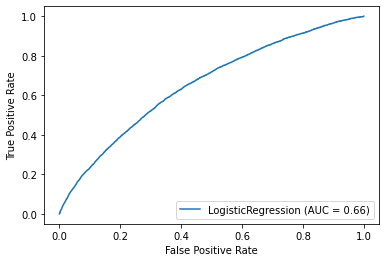

In [103]:
plot_roc_curve(lr,X =X_train, y= Y_train)

In [104]:
### Getting confusion matrix, F-score on the train data #####

print(confusion_matrix(y_true = Y_train, y_pred = lr.predict(X_train))) ### confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=Y_train,y_pred = lr.predict(X_train),sample_weight = Y_train))

[[27579 15967]
 [ 2442  3640]]
The F1-SCORE on the train set prediction  0.7488171158197902


0    10887
1     1520
Name: Junk, dtype: int64
[[6858 4029]
 [ 613  907]]
The F1-SCORE on the test set prediction  0.7474248042851257


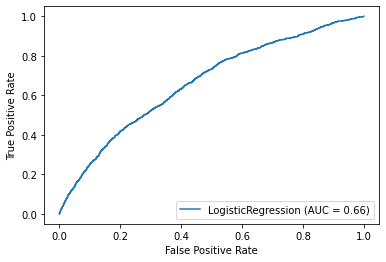

In [105]:
print(Y_val.value_counts())

plot_roc_curve(lr ,X =X_val, y= Y_val)

predicted_test = lr.predict(X_val)

print (confusion_matrix(y_true = Y_val, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=Y_val,y_pred = predicted_test,sample_weight = Y_val))

In [106]:
with open('P5_logistic_model.pickle','wb') as f:
  pickle.dump(lr,f)

# Decision Trees

In [107]:
clf = DecisionTreeClassifier(class_weight ='balanced',max_depth = 5, criterion = 'entropy',max_features=8,min_samples_split=10)

clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=8, min_samples_split=10)

In [108]:

clf=DecisionTreeClassifier()
#clf = LogisticRegression()  
#clf = SVC()

params={'class_weight':['balanced'], 
        'max_features' : [1,5],
        'max_depth' : [6,7,8,9,10],
        'criterion' :['gini','entropy'],
        'min_samples_split' : [2,5,10,20]} 

In [109]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1', return_train_score=True)

grid_search.fit(featuresdf,targetdf)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10], 'max_features': [1, 5],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='f1')

In [ ]:

clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=50, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

clf.fit(X_train,Y_train)

[[24956 18590]
 [ 1930  4152]]
The F1-SCORE on the train set prediction  0.8114129372679304


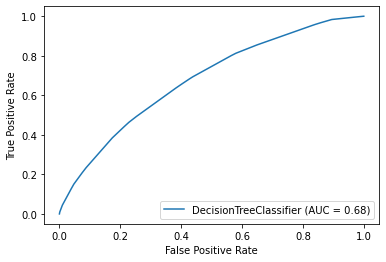

In [114]:
predicted_train = clf.predict(X_train)

plot_roc_curve(clf,X =X_train, y= Y_train)

#print ('The score for the DT model ', roc_auc_score(Y_train,predicted_train))

print(confusion_matrix(y_true = Y_train, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=Y_train,y_pred = predicted_train,sample_weight = Y_train))

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=50)

[[24956 18590]
 [ 1930  4152]]
The F1-SCORE on the train set prediction  0.8114129372679304


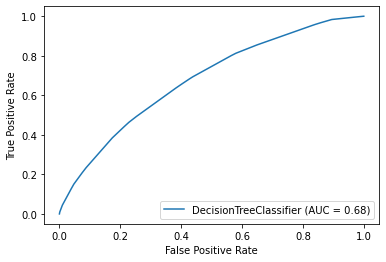

In [115]:


plot_roc_curve(clf,X =X_train, y= Y_train)

#print ('The score for the DT model ', roc_auc_score(Y_train,predicted_train))

print(confusion_matrix(y_true = Y_train, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=Y_train,y_pred = predicted_train,sample_weight = Y_train))

# Random Forest

In [116]:
clf = RandomForestClassifier() ### random forest function from  sklearn

params={'n_estimators':[50,70,100],
        'class_weight':['balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[8,9,10],
        'min_samples_split':[5,10,12,13,15],
        'max_samples':[0.7,0.8,0.9]}        #### parameter combinations

In [ ]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1',return_train_score=True)

grid_search.fit(featuresdf,targetdf)

In [ ]:
print(best_estimator_) #### best combination

print(grid_search.best_score_) #### best score

best_params = grid_search.best_estimator_